In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings

warnings.filterwarnings('ignore')

In [3]:
migration_df = pd.read_csv('PEA03.20231022T221016.csv')
population_df = pd.read_csv('PEA11.20231013T111046.csv')

In [4]:
population_df.head()

,STATISTIC,STATISTIC Label,TLIST(A1),Year,C02076V03371,Single Year of Age,C02199V02655,Sex,UNIT,VALUE
0,PEA11,Population estimates from 1926,1926,1926,-,All ages,-,Both sexes,Number,2971992
1,PEA11,Population estimates from 1926,1926,1926,-,All ages,1,Male,Number,1506889
2,PEA11,Population estimates from 1926,1926,1926,-,All ages,2,Female,Number,1465103
3,PEA11,Population estimates from 1926,1926,1926,200,Under 1 year,-,Both sexes,Number,55391
4,PEA11,Population estimates from 1926,1926,1926,200,Under 1 year,1,Male,Number,28084


In [5]:
population_df = population_df.drop(['STATISTIC', 'TLIST(A1)', 'C02076V03371'], axis=1)
population_df

,STATISTIC Label,Year,Single Year of Age,C02199V02655,Sex,UNIT,VALUE
0,Population estimates from 1926,1926,All ages,-,Both sexes,Number,2971992
1,Population estimates from 1926,1926,All ages,1,Male,Number,1506889
2,Population estimates from 1926,1926,All ages,2,Female,Number,1465103
3,Population estimates from 1926,1926,Under 1 year,-,Both sexes,Number,55391
4,Population estimates from 1926,1926,Under 1 year,1,Male,Number,28084
...,...,...,...,...,...,...,...
11812,Population estimates from 1926,2023,98 years,1,Male,Number,197
11813,Population estimates from 1926,2023,98 years,2,Female,Number,632
11814,Population estimates from 1926,2023,99 years and over,-,Both sexes,Number,1600
11815,Population estimates from 1926,2023,99 years and over,1,Male,Number,352


In [6]:
populattion_df_age_groups_for_ml = population_df[(population_df['Single Year of Age'] != 'All ages') & (population_df['Year'] > 1995) & (population_df['Sex'] != 'Both sexes')]
populattion_df_age_groups_for_ml.head()


,STATISTIC Label,Year,Single Year of Age,C02199V02655,Sex,UNIT,VALUE
3337,Population estimates from 1926,1996,Under 1 year,1,Male,Number,25231
3338,Population estimates from 1926,1996,Under 1 year,2,Female,Number,23623
3340,Population estimates from 1926,1996,1 year,1,Male,Number,24963
3341,Population estimates from 1926,1996,1 year,2,Female,Number,23611
3343,Population estimates from 1926,1996,2 years,1,Male,Number,25245


In [7]:
try:
    populattion_df_age_groups_for_ml['Single Year of Age'] = populattion_df_age_groups_for_ml['Single Year of Age'].replace('Under 1 year', '0 year')
    output = populattion_df_age_groups_for_ml.head()
except Exception as e:
    output = f"An error occurred: {e}"

output

,STATISTIC Label,Year,Single Year of Age,C02199V02655,Sex,UNIT,VALUE
3337,Population estimates from 1926,1996,0 year,1,Male,Number,25231
3338,Population estimates from 1926,1996,0 year,2,Female,Number,23623
3340,Population estimates from 1926,1996,1 year,1,Male,Number,24963
3341,Population estimates from 1926,1996,1 year,2,Female,Number,23611
3343,Population estimates from 1926,1996,2 years,1,Male,Number,25245


In [8]:
populattion_df_age_groups_for_ml['Single Year of Age'] = populattion_df_age_groups_for_ml['Single Year of Age'].str.extract(r'(\d+)').astype(int)
populattion_df_age_groups_for_ml


,STATISTIC Label,Year,Single Year of Age,C02199V02655,Sex,UNIT,VALUE
3337,Population estimates from 1926,1996,0,1,Male,Number,25231
3338,Population estimates from 1926,1996,0,2,Female,Number,23623
3340,Population estimates from 1926,1996,1,1,Male,Number,24963
3341,Population estimates from 1926,1996,1,2,Female,Number,23611
3343,Population estimates from 1926,1996,2,1,Male,Number,25245
...,...,...,...,...,...,...,...
11810,Population estimates from 1926,2023,97,2,Female,Number,821
11812,Population estimates from 1926,2023,98,1,Male,Number,197
11813,Population estimates from 1926,2023,98,2,Female,Number,632
11815,Population estimates from 1926,2023,99,1,Male,Number,352


In [9]:
def age_group(age):
    if age <= 14:
        return '0 - 14 years'
    elif age <= 24:
        return '15 - 24 years'
    elif age <= 44:
        return '25 - 44 years'
    elif age <= 64:
        return '45 - 64 years'
    else:
        return '65 years and over'

populattion_df_age_groups_for_ml['Age Group'] = populattion_df_age_groups_for_ml['Single Year of Age'].apply(age_group)

populattion_df_age_groups_for_ml


,STATISTIC Label,Year,Single Year of Age,C02199V02655,Sex,UNIT,VALUE,Age Group
3337,Population estimates from 1926,1996,0,1,Male,Number,25231,0 - 14 years
3338,Population estimates from 1926,1996,0,2,Female,Number,23623,0 - 14 years
3340,Population estimates from 1926,1996,1,1,Male,Number,24963,0 - 14 years
3341,Population estimates from 1926,1996,1,2,Female,Number,23611,0 - 14 years
3343,Population estimates from 1926,1996,2,1,Male,Number,25245,0 - 14 years
...,...,...,...,...,...,...,...,...
11810,Population estimates from 1926,2023,97,2,Female,Number,821,65 years and over
11812,Population estimates from 1926,2023,98,1,Male,Number,197,65 years and over
11813,Population estimates from 1926,2023,98,2,Female,Number,632,65 years and over
11815,Population estimates from 1926,2023,99,1,Male,Number,352,65 years and over


In [10]:
populattion_df_age_groups_for_ml.drop(['Single Year of Age'], axis = 1)


,STATISTIC Label,Year,C02199V02655,Sex,UNIT,VALUE,Age Group
3337,Population estimates from 1926,1996,1,Male,Number,25231,0 - 14 years
3338,Population estimates from 1926,1996,2,Female,Number,23623,0 - 14 years
3340,Population estimates from 1926,1996,1,Male,Number,24963,0 - 14 years
3341,Population estimates from 1926,1996,2,Female,Number,23611,0 - 14 years
3343,Population estimates from 1926,1996,1,Male,Number,25245,0 - 14 years
...,...,...,...,...,...,...,...
11810,Population estimates from 1926,2023,2,Female,Number,821,65 years and over
11812,Population estimates from 1926,2023,1,Male,Number,197,65 years and over
11813,Population estimates from 1926,2023,2,Female,Number,632,65 years and over
11815,Population estimates from 1926,2023,1,Male,Number,352,65 years and over


<span style="color:red;">
  #TODO Change " data_grouped_by_year " with more apropriate name"
</span>


In [11]:
data_grouped_by_year = populattion_df_age_groups_for_ml.groupby(['Year', 'Age Group', 'Sex'])['VALUE'].sum().reset_index()

In [12]:
data_grouped_by_year

,Year,Age Group,Sex,VALUE
0,1996,0 - 14 years,Female,417972
1,1996,0 - 14 years,Male,441452
2,1996,15 - 24 years,Female,309797
3,1996,15 - 24 years,Male,323093
4,1996,25 - 44 years,Female,512789
...,...,...,...,...
275,2023,25 - 44 years,Male,708172
276,2023,45 - 64 years,Female,677223
277,2023,45 - 64 years,Male,661516
278,2023,65 years and over,Female,426368


#### MIgration dataset with age groups

In [13]:
migration_df.head(20)

,STATISTIC,STATISTIC Label,TLIST(A1),Year,C02076V03371,Age Group,C02199V02655,Sex,C02542V03077,Inward or Outward Flow,UNIT,VALUE
0,PEA03,Estimated Migration (Persons in April),1987,1987,-,All ages,-,Both sexes,1,Net migration,Thousand,-23.0
1,PEA03,Estimated Migration (Persons in April),1987,1987,-,All ages,-,Both sexes,4,Emigrants: All destinations,Thousand,40.2
2,PEA03,Estimated Migration (Persons in April),1987,1987,-,All ages,-,Both sexes,5,Immigrants: All origins,Thousand,17.2
3,PEA03,Estimated Migration (Persons in April),1987,1987,-,All ages,1,Male,1,Net migration,Thousand,NaN
4,PEA03,Estimated Migration (Persons in April),1987,1987,-,All ages,1,Male,4,Emigrants: All destinations,Thousand,NaN
5,PEA03,Estimated Migration (Persons in April),1987,1987,-,All ages,1,Male,5,Immigrants: All origins,Thousand,NaN
6,PEA03,Estimated Migration (Persons in April),1987,1987,-,All ages,2,Female,1,Net migration,Thousand,NaN
7,PEA03,Estimated Migration (Persons in April),1987,1987,-,All ages,2,Female,4,Emigrants: All destinations,Thousand,NaN
8,PEA03,Estimated Migration (Persons in April),1987,1987,-,All ages,2,Female,5,Immigrants: All origins,Thousand,NaN
9,PEA03,Estimated Migration (Persons in April),1987,1987,215,0 - 14 years,-,Both sexes,1,Net migration,Thousand,NaN


In [14]:
migration_df = migration_df.drop(['STATISTIC', 'TLIST(A1)', 'C02076V03371','C02199V02655','C02542V03077'  ], axis=1)
migration_df

,STATISTIC Label,Year,Age Group,Sex,Inward or Outward Flow,UNIT,VALUE
0,Estimated Migration (Persons in April),1987,All ages,Both sexes,Net migration,Thousand,-23.0
1,Estimated Migration (Persons in April),1987,All ages,Both sexes,Emigrants: All destinations,Thousand,40.2
2,Estimated Migration (Persons in April),1987,All ages,Both sexes,Immigrants: All origins,Thousand,17.2
3,Estimated Migration (Persons in April),1987,All ages,Male,Net migration,Thousand,NaN
4,Estimated Migration (Persons in April),1987,All ages,Male,Emigrants: All destinations,Thousand,NaN
...,...,...,...,...,...,...,...
1993,Estimated Migration (Persons in April),2023,65 years and over,Male,Emigrants: All destinations,Thousand,0.4
1994,Estimated Migration (Persons in April),2023,65 years and over,Male,Immigrants: All origins,Thousand,1.5
1995,Estimated Migration (Persons in April),2023,65 years and over,Female,Net migration,Thousand,1.8
1996,Estimated Migration (Persons in April),2023,65 years and over,Female,Emigrants: All destinations,Thousand,0.6


In [15]:
migration_df_age_group_for_ml = migration_df[(migration_df['Age Group'] != 'All ages') & (migration_df['Year'] > 1995) & (migration_df['Sex'] != 'Both sexes')]
migration_df_age_group_for_ml.head(10)

,STATISTIC Label,Year,Age Group,Sex,Inward or Outward Flow,UNIT,VALUE
498,Estimated Migration (Persons in April),1996,0 - 14 years,Male,Net migration,Thousand,NaN
499,Estimated Migration (Persons in April),1996,0 - 14 years,Male,Emigrants: All destinations,Thousand,0.4
500,Estimated Migration (Persons in April),1996,0 - 14 years,Male,Immigrants: All origins,Thousand,3.1
501,Estimated Migration (Persons in April),1996,0 - 14 years,Female,Net migration,Thousand,NaN
502,Estimated Migration (Persons in April),1996,0 - 14 years,Female,Emigrants: All destinations,Thousand,0.6
503,Estimated Migration (Persons in April),1996,0 - 14 years,Female,Immigrants: All origins,Thousand,3.6
507,Estimated Migration (Persons in April),1996,15 - 24 years,Male,Net migration,Thousand,NaN
508,Estimated Migration (Persons in April),1996,15 - 24 years,Male,Emigrants: All destinations,Thousand,9.8
509,Estimated Migration (Persons in April),1996,15 - 24 years,Male,Immigrants: All origins,Thousand,4.2
510,Estimated Migration (Persons in April),1996,15 - 24 years,Female,Net migration,Thousand,NaN


In [16]:
migration_df_age_group_for_ml.isna().sum()

STATISTIC Label            0
Year                       0
Age Group                  0
Sex                        0
Inward or Outward Flow     0
UNIT                       0
VALUE                     60
dtype: int64

We have some missing values for the net migration. However, the net migration is the difference between immigrants and emigrants, so this can be easily calculated and thos values can be imputated. 

In [17]:
pivot_table = migration_df_age_group_for_ml.pivot_table(
    values='VALUE', 
    index=['Year', 'Age Group', 'Sex'], 
    columns='Inward or Outward Flow', 
    aggfunc='first'
).reset_index()

# Calculate net migration if not already present
pivot_table['Net migration calculated'] = pivot_table['Immigrants: All origins'] - pivot_table['Emigrants: All destinations']

# Replace the existing net migration with the calculated one if it's NaN
pivot_table['Net migration'] = pivot_table['Net migration'].fillna(pivot_table['Net migration calculated'])

# Display the result
pivot_table[['Year', 'Age Group', 'Sex', 'Net migration']].head()

Inward or Outward Flow,Year,Age Group,Sex,Net migration
0,1996,0 - 14 years,Female,3.0
1,1996,0 - 14 years,Male,2.7
2,1996,15 - 24 years,Female,-5.0
3,1996,15 - 24 years,Male,-5.6
4,1996,25 - 44 years,Female,5.1


In [18]:
def calculate_net_migration(group):
    immigrants = group[group['Inward or Outward Flow'] == 'Immigrants: All origins']['VALUE'].values[0]
    emigrants = group[group['Inward or Outward Flow'] == 'Emigrants: All destinations']['VALUE'].values[0]
    net_migration = immigrants - emigrants
    group.loc[group['Inward or Outward Flow'] == 'Net migration', 'VALUE'] = net_migration
    return group

# Apply the function to each group
migration_df_age_group_for_ml = migration_df_age_group_for_ml.groupby(['Year', 'Age Group', 'Sex']).apply(calculate_net_migration).reset_index(drop=True)

# Display the updated dataframe to verify the imputation
migration_df_age_group_for_ml.head(20)

,STATISTIC Label,Year,Age Group,Sex,Inward or Outward Flow,UNIT,VALUE
0,Estimated Migration (Persons in April),1996,0 - 14 years,Female,Net migration,Thousand,3.0
1,Estimated Migration (Persons in April),1996,0 - 14 years,Female,Emigrants: All destinations,Thousand,0.6
2,Estimated Migration (Persons in April),1996,0 - 14 years,Female,Immigrants: All origins,Thousand,3.6
3,Estimated Migration (Persons in April),1996,0 - 14 years,Male,Net migration,Thousand,2.7
4,Estimated Migration (Persons in April),1996,0 - 14 years,Male,Emigrants: All destinations,Thousand,0.4
5,Estimated Migration (Persons in April),1996,0 - 14 years,Male,Immigrants: All origins,Thousand,3.1
6,Estimated Migration (Persons in April),1996,15 - 24 years,Female,Net migration,Thousand,-5.0
7,Estimated Migration (Persons in April),1996,15 - 24 years,Female,Emigrants: All destinations,Thousand,11.7
8,Estimated Migration (Persons in April),1996,15 - 24 years,Female,Immigrants: All origins,Thousand,6.7
9,Estimated Migration (Persons in April),1996,15 - 24 years,Male,Net migration,Thousand,-5.6


In [19]:
#converting to number so that it can match the unit from the population

migration_df_age_group_for_ml['VALUE'] = migration_df_age_group_for_ml['VALUE'] * 1000

In [20]:
migration_df_age_group_for_ml

,STATISTIC Label,Year,Age Group,Sex,Inward or Outward Flow,UNIT,VALUE
0,Estimated Migration (Persons in April),1996,0 - 14 years,Female,Net migration,Thousand,3000.0
1,Estimated Migration (Persons in April),1996,0 - 14 years,Female,Emigrants: All destinations,Thousand,600.0
2,Estimated Migration (Persons in April),1996,0 - 14 years,Female,Immigrants: All origins,Thousand,3600.0
3,Estimated Migration (Persons in April),1996,0 - 14 years,Male,Net migration,Thousand,2700.0
4,Estimated Migration (Persons in April),1996,0 - 14 years,Male,Emigrants: All destinations,Thousand,400.0
...,...,...,...,...,...,...,...
835,Estimated Migration (Persons in April),2023,65 years and over,Female,Emigrants: All destinations,Thousand,600.0
836,Estimated Migration (Persons in April),2023,65 years and over,Female,Immigrants: All origins,Thousand,2500.0
837,Estimated Migration (Persons in April),2023,65 years and over,Male,Net migration,Thousand,1100.0
838,Estimated Migration (Persons in April),2023,65 years and over,Male,Emigrants: All destinations,Thousand,400.0


In [21]:
merged_df = pd.merge(data_grouped_by_year, migration_df_age_group_for_ml, on=['Year', 'Age Group', 'Sex'], how='right')


In [22]:
merged_df.head(20)

,Year,Age Group,Sex,VALUE_x,STATISTIC Label,Inward or Outward Flow,UNIT,VALUE_y
0,1996,0 - 14 years,Female,417972,Estimated Migration (Persons in April),Net migration,Thousand,3000.0
1,1996,0 - 14 years,Female,417972,Estimated Migration (Persons in April),Emigrants: All destinations,Thousand,600.0
2,1996,0 - 14 years,Female,417972,Estimated Migration (Persons in April),Immigrants: All origins,Thousand,3600.0
3,1996,0 - 14 years,Male,441452,Estimated Migration (Persons in April),Net migration,Thousand,2700.0
4,1996,0 - 14 years,Male,441452,Estimated Migration (Persons in April),Emigrants: All destinations,Thousand,400.0
5,1996,0 - 14 years,Male,441452,Estimated Migration (Persons in April),Immigrants: All origins,Thousand,3100.0
6,1996,15 - 24 years,Female,309797,Estimated Migration (Persons in April),Net migration,Thousand,-5000.0
7,1996,15 - 24 years,Female,309797,Estimated Migration (Persons in April),Emigrants: All destinations,Thousand,11700.0
8,1996,15 - 24 years,Female,309797,Estimated Migration (Persons in April),Immigrants: All origins,Thousand,6700.0
9,1996,15 - 24 years,Male,323093,Estimated Migration (Persons in April),Net migration,Thousand,-5600.0


In [23]:
df_merged_final = merged_df.drop('UNIT', axis=1)

In [24]:
df_merged_final.head(10)

,Year,Age Group,Sex,VALUE_x,STATISTIC Label,Inward or Outward Flow,VALUE_y
0,1996,0 - 14 years,Female,417972,Estimated Migration (Persons in April),Net migration,3000.0
1,1996,0 - 14 years,Female,417972,Estimated Migration (Persons in April),Emigrants: All destinations,600.0
2,1996,0 - 14 years,Female,417972,Estimated Migration (Persons in April),Immigrants: All origins,3600.0
3,1996,0 - 14 years,Male,441452,Estimated Migration (Persons in April),Net migration,2700.0
4,1996,0 - 14 years,Male,441452,Estimated Migration (Persons in April),Emigrants: All destinations,400.0
5,1996,0 - 14 years,Male,441452,Estimated Migration (Persons in April),Immigrants: All origins,3100.0
6,1996,15 - 24 years,Female,309797,Estimated Migration (Persons in April),Net migration,-5000.0
7,1996,15 - 24 years,Female,309797,Estimated Migration (Persons in April),Emigrants: All destinations,11700.0
8,1996,15 - 24 years,Female,309797,Estimated Migration (Persons in April),Immigrants: All origins,6700.0
9,1996,15 - 24 years,Male,323093,Estimated Migration (Persons in April),Net migration,-5600.0


In [25]:
pivot_df = df_merged_final.pivot_table(
    index=['Year', 'Age Group', 'Sex', 'VALUE_x'], 
    columns='Inward or Outward Flow', 
    values='VALUE_y', 
    aggfunc='first'  # Since we assume there is only one value for each type and group
).reset_index()

# Rename the columns for clarity
pivot_df.columns.name = None  # Remove the name of the columns' level
pivot_df = pivot_df.rename(columns={
    "Emigrants: All destinations": "Emigrants_All_Destinations",
    "Immigrants: All origins": "Immigrants_All_Origins",
    "Net migration": "Net_Migration"
})

pivot_df.head()

,Year,Age Group,Sex,VALUE_x,Emigrants_All_Destinations,Immigrants_All_Origins,Net_Migration
0,1996,0 - 14 years,Female,417972,600.0,3600.0,3000.0
1,1996,0 - 14 years,Male,441452,400.0,3100.0,2700.0
2,1996,15 - 24 years,Female,309797,11700.0,6700.0,-5000.0
3,1996,15 - 24 years,Male,323093,9800.0,4200.0,-5600.0
4,1996,25 - 44 years,Female,512789,3000.0,8100.0,5100.0


In [26]:
pivot_df_renamed = pivot_df.rename(columns={'VALUE_x': 'Population'})
pivot_df_renamed

,Year,Age Group,Sex,Population,Emigrants_All_Destinations,Immigrants_All_Origins,Net_Migration
0,1996,0 - 14 years,Female,417972,600.0,3600.0,3000.0
1,1996,0 - 14 years,Male,441452,400.0,3100.0,2700.0
2,1996,15 - 24 years,Female,309797,11700.0,6700.0,-5000.0
3,1996,15 - 24 years,Male,323093,9800.0,4200.0,-5600.0
4,1996,25 - 44 years,Female,512789,3000.0,8100.0,5100.0
...,...,...,...,...,...,...,...
275,2023,25 - 44 years,Male,708172,17200.0,36800.0,19600.0
276,2023,45 - 64 years,Female,677223,2200.0,10300.0,8100.0
277,2023,45 - 64 years,Male,661516,3000.0,6600.0,3600.0
278,2023,65 years and over,Female,426368,600.0,2500.0,1900.0


In [27]:
pivot_df_renamed['Migration_Rate'] = (pivot_df_renamed['Net_Migration'] / pivot_df_renamed['Population']) * 1000

pivot_df_renamed.head()

,Year,Age Group,Sex,Population,Emigrants_All_Destinations,Immigrants_All_Origins,Net_Migration,Migration_Rate
0,1996,0 - 14 years,Female,417972,600.0,3600.0,3000.0,7.177514
1,1996,0 - 14 years,Male,441452,400.0,3100.0,2700.0,6.116180
2,1996,15 - 24 years,Female,309797,11700.0,6700.0,-5000.0,-16.139601
3,1996,15 - 24 years,Male,323093,9800.0,4200.0,-5600.0,-17.332471
4,1996,25 - 44 years,Female,512789,3000.0,8100.0,5100.0,9.945611


I will use the Shapiro-Wilk test to determine if the migration rate data for various age groups are consistent with a normal distribution.

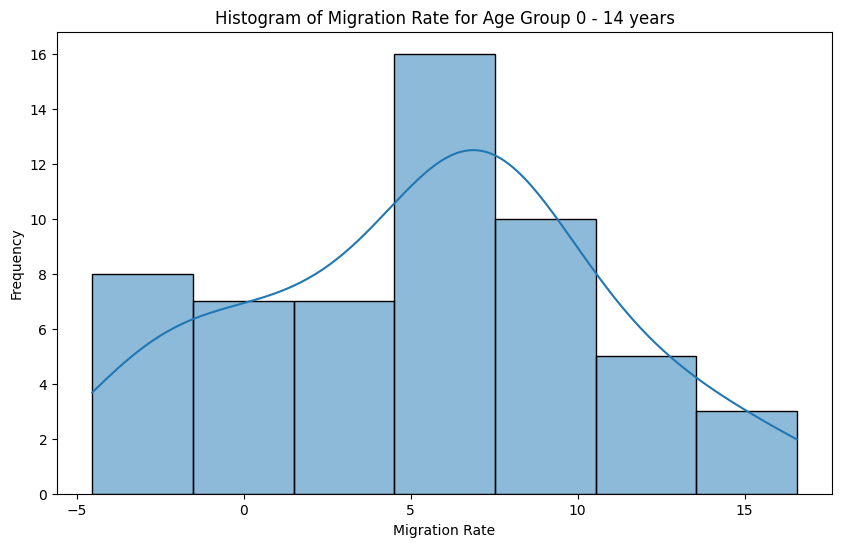

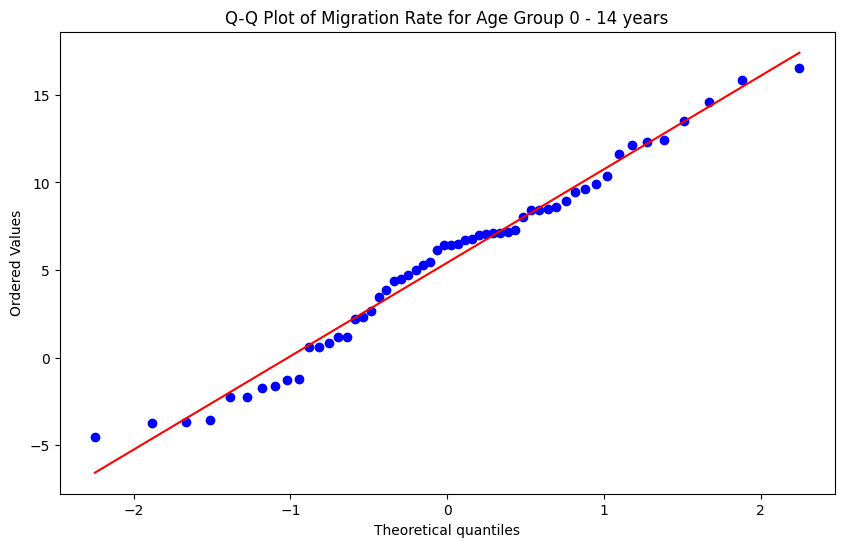

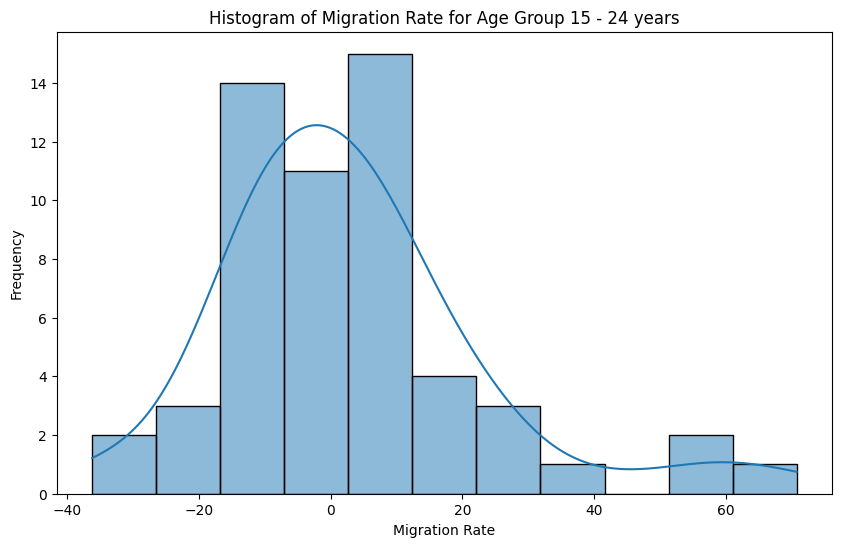

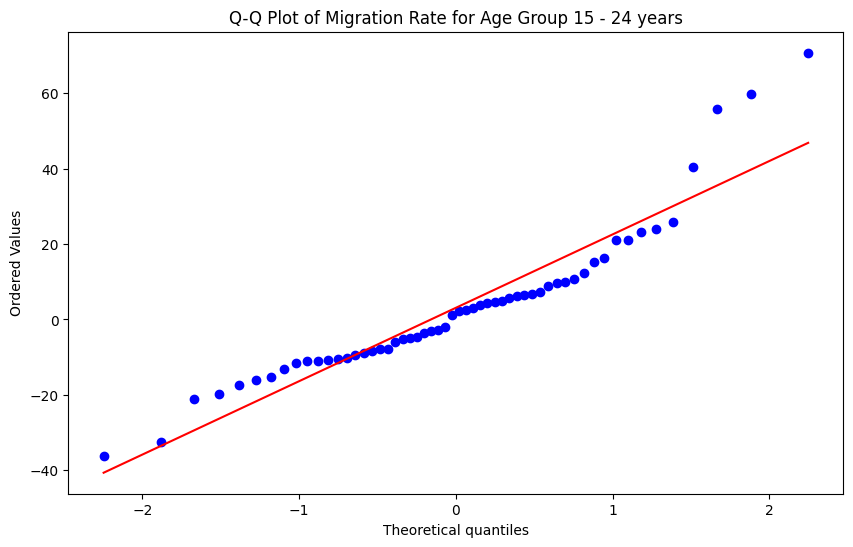

{'0 - 14 years': ShapiroResult(statistic=0.9760842323303223, pvalue=0.3281641900539398),
 '15 - 24 years': ShapiroResult(statistic=0.9030325412750244, pvalue=0.00028005740023218095)}

In [28]:
# Get unique age groups from the dataset
selected_age_groups = ['0 - 14 years', '15 - 24 years']

# Create a dictionary to store the results of Shapiro-Wilk test for each age group
shapiro_results = {}

# Plotting histograms and Q-Q plots for each age group and performing Shapiro-Wilk test
for age_group in selected_age_groups:
    # Filter the dataset for the current age group
    current_age_group_data = pivot_df_renamed[pivot_df_renamed['Age Group'] == age_group]

    # Visual assessment of normality using a histogram
    plt.figure(figsize=(10, 6))
    sns.histplot(current_age_group_data['Migration_Rate'], kde=True)
    plt.title(f'Histogram of Migration Rate for Age Group {age_group}')
    plt.xlabel('Migration Rate')
    plt.ylabel('Frequency')
    plt.show()

    # Visual assessment of normality using a Q-Q plot
    plt.figure(figsize=(10, 6))
    stats.probplot(current_age_group_data['Migration_Rate'], dist="norm", plot=plt)
    plt.title(f'Q-Q Plot of Migration Rate for Age Group {age_group}')
    plt.show()

    # Perform the Shapiro-Wilk test for normality
    shapiro_test = stats.shapiro(current_age_group_data['Migration_Rate'])
    shapiro_results[age_group] = shapiro_test

shapiro_results


Age Group 0 - 14 years

The histogram likely showed a bell-shaped curve, which is one indicator of normal distribution.

If the points in the Q-Q plot followed a straight line closely, this would be another indicator that the data comes from a distribution that is approximately normal. Deviations at the ends of the plot can indicate skewness or the presence of outliers.

Shapiro-Wilk Test: With a p-value of approximately 0.328, the test does not provide enough evidence to reject the null hypothesis that the data is normally distributed. This means that, statistically, the migration rate for the 0 - 14 years age group can be considered to follow a normal distribution at the 5% significance level (α=0.05)

Age Group 15 - 24 years

The histogram for this group likely showed deviations from the bell shape, which would suggest non-normality.

Significant deviations from the straight line in the Q-Q plot would indicate that the data does not follow a normal distribution. 

Shapiro-Wilk Test: The p-value is approximately 0.00028, which is well below the conventional threshold of 0.05. This provides strong evidence to reject the null hypothesis, suggesting that the migration rate for the 15 - 24 years age group is not normally distributed.

For the purpose of the exercise, I are assuming that the migration rate for the age group 0 - 14 years follows a normal distribution based on the Shapiro-Wilk test, which did not provide sufficient evidence to reject the null hypothesis at the 5% significance level. Given this assumption, I will proceed to calculate probabilities regarding the migration rate for this age group.

In [29]:
age_group_0_14_data = pivot_df_renamed[pivot_df_renamed['Age Group'] == '0 - 14 years']


In [30]:
mu = age_group_0_14_data['Migration_Rate'].mean()
sigma = age_group_0_14_data['Migration_Rate'].std()

mu, sigma

(5.414663764591353, 5.2542681950880565)

In [31]:
prob_below_2 = stats.norm.cdf(2, mu, sigma)

# Calculate the probability that the migration rate is greater than 8% for the 0-14 age group
prob_above_8 = 1 - stats.norm.cdf(8, mu, sigma)

prob_below_2, prob_above_8

(0.2578836426103457, 0.3113437766894116)

The probability that the migration rate will be less than 2% is approximately 25.79%.
The probability that the migration rate will be greater than 8% is approximately 31.13%